In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.metrics import r2_score , mean_squared_error , accuracy_score , precision_score , recall_score , roc_auc_score

import joblib



In [2]:
DATA_FILE_PATH = r"./insurance_data.csv"
df = pd.read_csv(DATA_FILE_PATH)

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


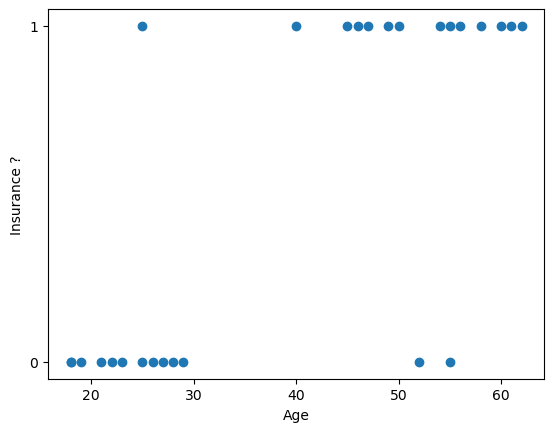

In [4]:
plt.xlabel("Age")
plt.ylabel("Insurance ?")
plt.scatter(df['age'],df['bought_insurance'] )
plt.yticks(np.arange(2))
plt.show()

In [5]:
TRAIN_SIZE = 0.9
RANDOM_STATE = 3
X_train, X_test , y_train , y_test = train_test_split(df["age"] , df['bought_insurance'] , train_size= TRAIN_SIZE , random_state=RANDOM_STATE)

In [6]:
X_train = np.reshape( X_train.values , (-1 , 1))

In [7]:
X_test = np.reshape( X_test.values , (-1 , 1))


Linear Regression model ?

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [9]:
reg.coef_ , reg.intercept_

(array([0.02289303]), -0.380731760775748)

In [10]:
y_pred = reg.predict(X_test)

In [11]:
reg.score(X_test , y_test)

0.9068604199171515

In [12]:
mean_squared_error(y_pred , y_test)

0.02069768446285523

In [13]:
r2_score(y_pred , y_test)

0.8603955606237482

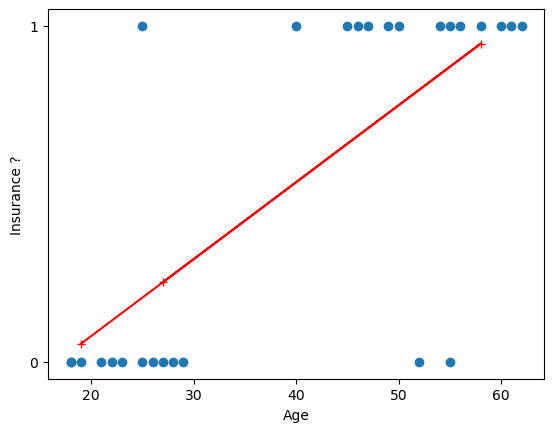

In [14]:
plt.xlabel("Age")
plt.ylabel("Insurance ?")
plt.scatter(df['age'],df['bought_insurance'] )
plt.plot(X_test , y_pred , color = "red"  , marker = "+")
plt.yticks(np.arange(2))
plt.show()

Logistic Regression

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train , y_train)

LogisticRegression()

In [16]:
log_reg.coef_ , log_reg.intercept_

(array([[0.12579119]]), array([-4.82157279]))

In [17]:
y_pred = log_reg.predict(X_test)

In [18]:
log_reg.predict_proba(X_test)

array([[0.91920099, 0.08079901],
       [0.07767842, 0.92232158],
       [0.80615397, 0.19384603]])

In [19]:
# Accuracy of the model
log_reg.score(X_test , y_test)

1.0

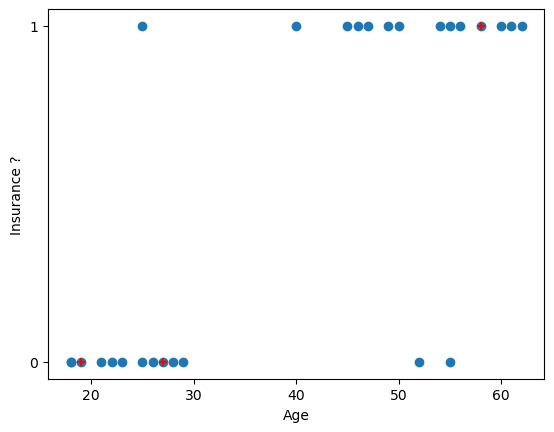

In [20]:
plt.xlabel("Age")
plt.ylabel("Insurance ?")
plt.scatter(df['age'],df['bought_insurance'] )
plt.scatter(X_test , y_pred , color = "red"  , marker = "+")
plt.yticks(np.arange(2))
plt.show()

Saving the Model

In [22]:
MODEL_SAVE_PATH = r"./insurance_pred_model"
joblib.dump(log_reg , MODEL_SAVE_PATH)

['./insurance_pred_model']

In [23]:
del log_reg

Loading the model

In [24]:
log_reg = joblib.load(MODEL_SAVE_PATH)

In [25]:
log_reg.coef_ , log_reg.intercept_


(array([[0.12579119]]), array([-4.82157279]))

In [42]:
X_test = np.reshape(df['age'].values , [-1,1])
y_test = df["bought_insurance"]
y_pred = log_reg.predict(X_test)


In [43]:
log_reg.predict_proba(X_test)


array([[0.88636795, 0.11363205],
       [0.8424794 , 0.1575206 ],
       [0.2515028 , 0.7484972 ],
       [0.15192665, 0.84807335],
       [0.27591376, 0.72408624],
       [0.09772746, 0.90227254],
       [0.10939431, 0.89060569],
       [0.06146231, 0.93853769],
       [0.04845363, 0.95154637],
       [0.05459402, 0.94540598],
       [0.9280645 , 0.0719355 ],
       [0.78573725, 0.21426275],
       [0.80615397, 0.19384603],
       [0.7638002 , 0.2361998 ],
       [0.2071492 , 0.7928508 ],
       [0.10939431, 0.89060569],
       [0.8424794 , 0.1575206 ],
       [0.07767842, 0.92232158],
       [0.91920099, 0.08079901],
       [0.9280645 , 0.0719355 ],
       [0.89843521, 0.10156479],
       [0.82505837, 0.17494163],
       [0.44767355, 0.55232645],
       [0.30173892, 0.69826108],
       [0.18724879, 0.81275121],
       [0.12226524, 0.87773476],
       [0.87306948, 0.12693052]])

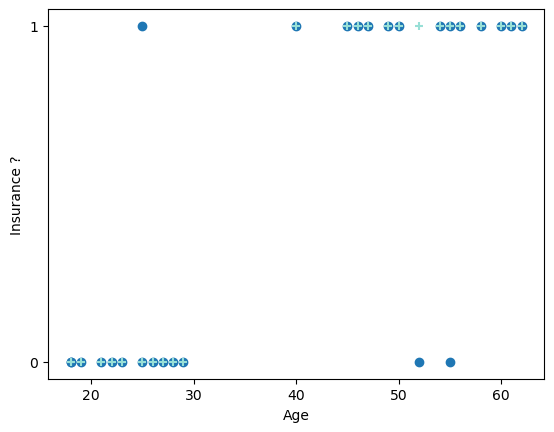

In [44]:
plt.xlabel("Age")
plt.ylabel("Insurance ?")
plt.scatter(df['age'],df['bought_insurance'] )
plt.scatter(X_test , y_pred , color = "#98DFD6"  , marker = "+")
plt.yticks(np.arange(2))
plt.show()

In [46]:
log_reg.score(X_test ,y_test )

0.8888888888888888

In [49]:
accuracy_score(y_pred , y_test)

0.8888888888888888

In [52]:
precision_score(y_pred , y_test)

0.9285714285714286

In [54]:
recall_score(y_pred , y_test)

0.8666666666666667

In [55]:
roc_auc_score(y_pred , y_test)

0.8916666666666666